## **Importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
stadiums = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadiums-v2_0.csv')
stadium_details = pd.read_csv('/kaggle/input/brazilian-stadiums-dataset/brazilian-stadium-details-v2_0.csv') 

In [3]:
stadiums.head()

,Stadium_Name,Locality,Federative_Units,Owner,Capacity
0,Maracanã,Rio de Janeiro,RJ,Governo Estadual,78838
1,Mané Garrincha,Brasília,DF,Governo Distrital,72788
2,Morumbi,São Paulo,SP,Privado,66975
3,Castelão,Fortaleza,CE,Governo Estadual,63903
4,Mineirão,Belo Horizonte,MG,Governo Estadual,61846


In [4]:
stadiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Stadium_Name      211 non-null    object
 1   Locality          211 non-null    object
 2   Federative_Units  211 non-null    object
 3   Owner             211 non-null    object
 4   Capacity          211 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [5]:
round(stadiums.describe(), 2)

,Capacity
count,211.00
mean,20131.00
std,13346.12
min,10000.00
25%,11635.00
50%,15010.00
75%,21586.50
max,78838.00


# **Data Analysis**

## **Perguntas:**

1. Há quantos proprietários distintos?
1. tem quantos estádios por proprietário?
1. quantas UFs distintas tem estádios?
1. tem quantas cidades com estádios por Ufs?
1. qual é a capacidade média dos estádios por cidade?
1. Top 10 estádios por capacidade?
1. Bottom 10 estádios por capacidade?


**Há quantos proprietários distintos?**

In [6]:
print('Count of Owners: ', stadiums['Owner'].nunique())

Count of Owners:  5


**tem quantos estádios por proprietário?**

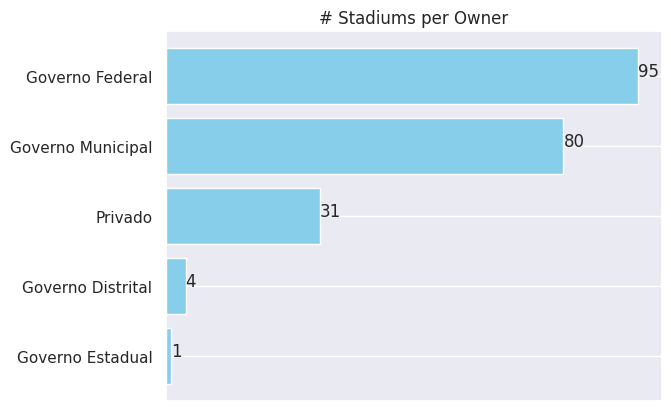

In [7]:
stadium_per_owner = pd.DataFrame(stadiums['Owner'].value_counts())
stadium_per_owner = stadium_per_owner.sort_values(by='count', ascending=True)
labels = stadiums['Owner'].unique()

plt.barh(labels, stadium_per_owner['count'], color='skyblue')
plt.title('# Stadiums per Owner')

# Remove the xticks
plt.xticks([])

for index, value in enumerate(stadium_per_owner['count']):
    plt.text(value, index, str(value), ha='left')

plt.show()

**quantas UFs distintas tem estádios?**

In [8]:
print('Count of Federative Units: ', stadiums['Federative_Units'].nunique())

Count of Federative Units:  27


All the Federative Units of Brazil have stadiums because Brazil has 27 FUs in total.

**tem quantas cidades com estádios por Ufs?**

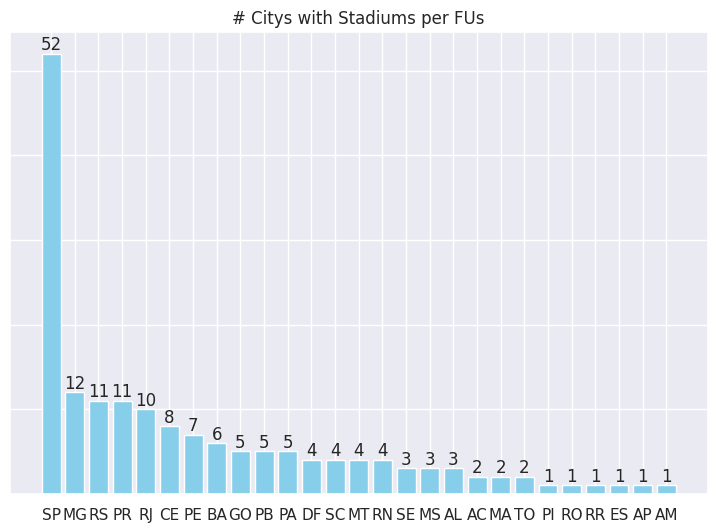

In [9]:
uniq_city_per_FUs = pd.DataFrame(stadiums.groupby('Federative_Units')['Locality'].nunique())
uniq_city_per_FUs = uniq_city_per_FUs.sort_values(by='Locality', ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(9, 6))

bar_container = ax.bar(uniq_city_per_FUs['Federative_Units'], uniq_city_per_FUs['Locality'],
                      color='skyblue')
ax.bar_label(bar_container)

# Esconder os rótulos (labels) do eixo y, mantendo os tiques (tics)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.title("# Citys with Stadiums per FUs")

plt.show()

alterar visual depois

**5) qual é a capacidade média dos estádios por cidade?**

In [10]:
colormap = ['YlGn', 'YlGn_r', 'OrRd', 'OrRd_r']

avg_capacity_per_city = stadiums.groupby('Locality')['Capacity'].describe().reset_index()
avg_capacity_per_city = avg_capacity_per_city[['Locality', 'count', 'mean']]
avg_capacity_per_city = avg_capacity_per_city[avg_capacity_per_city['count'] >= 2]

avg_capacity_per_city_top10 = avg_capacity_per_city[['Locality', 'mean']].sort_values(by='mean', ascending=False).head(10)
avg_capacity_per_city_bottom10 = avg_capacity_per_city[['Locality', 'mean']].sort_values(by='mean', ascending=False).tail(10)

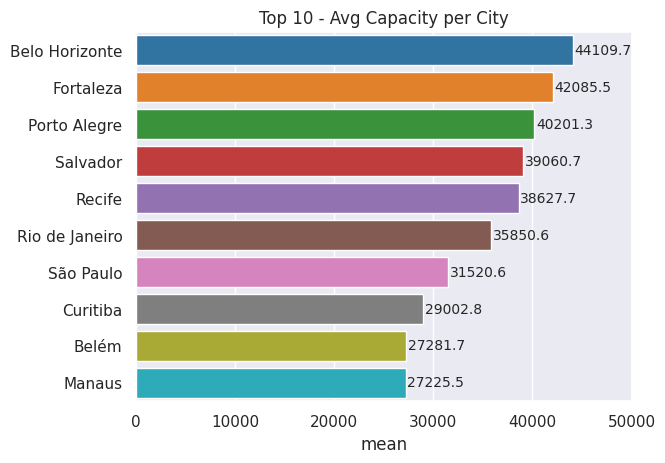

In [11]:
# Initialize the matplotlib figure
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_top10, palette='tab10')
plt.title('Top 10 - Avg Capacity per City')

ax.set(xlim=(0, 50000), ylabel="")

ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

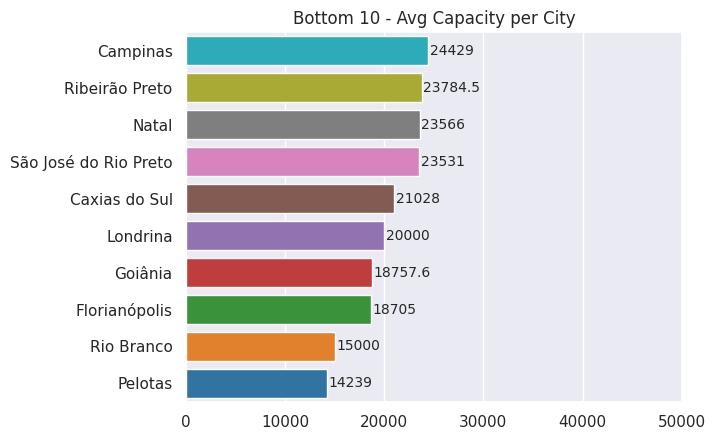

In [12]:
# Initialize the matplotlib figure
fig, ax = plt.subplots()

sns.barplot(x='mean', y='Locality', data=avg_capacity_per_city_bottom10, palette='tab10_r')
plt.title('Bottom 10 - Avg Capacity per City')

ax.set(xlim=(0, 50000), ylabel="",
      xlabel="")
ax.bar_label(ax.containers[0], fontsize=10, padding=1)

plt.show()

Top 10 estádios por capacidade?

Bottom 10 estádios por capacidade?

ver.1.0